+---------+---+------+
|     Name|Age|Salary|
+---------+---+------+
|    Alice| 34|  2000|
|      Bob| 45|  3000|
|Catherine| 29|  2300|
|   Daniel| 40|  4000|
|      Eva| 35|  3200|
+---------+---+------+

+---+--------------+
|Age|Average_Salary|
+---+--------------+
| 34|        2000.0|
| 45|        3000.0|
| 29|        2300.0|
| 40|        4000.0|
| 35|        3200.0|
+---+--------------+



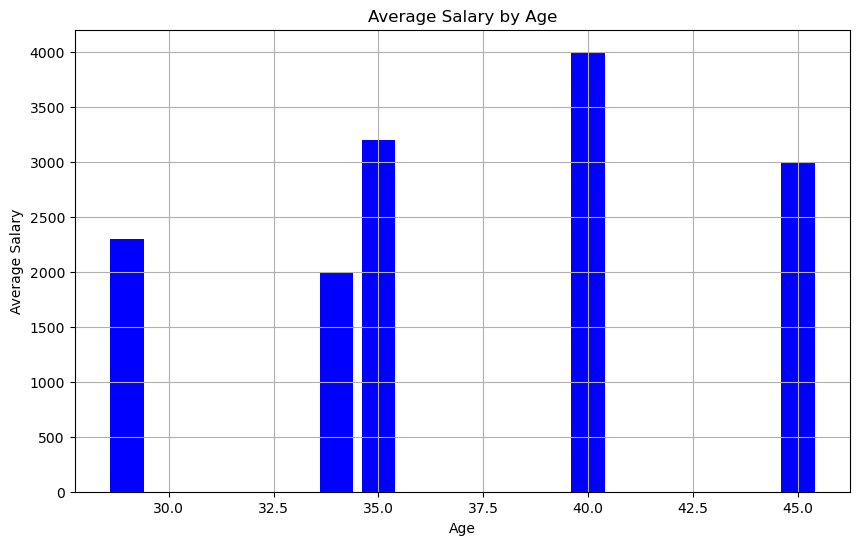

In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------#

spark = SparkSession.builder.appName("Aggregation Graph Plotting").getOrCreate()

# Create some sample data
data = [
    ("Alice"     , 34, 29000),
    ("Bob"       , 45, 31000),
    ("Catherine" , 29, 33000),
    ("Daniel"    , 40, 47000),
    ("Eva"       , 35, 53200)
]

columns = ["Name", "Age", "Salary"]
df = spark.createDataFrame(data, columns)

df.show()

# Perform a computation: Calculate average salary by age group
df_grouped = df.groupBy("Age").avg("Salary")
df_grouped = df_grouped.withColumnRenamed("avg(Salary)", "Average_Salary")

df_grouped.show()

# Convert to Pandas DataFrame for plotting
pd_df = df_grouped.toPandas()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(pd_df["Age"], pd_df["Average_Salary"], color="blue")
plt.xlabel("Age")
plt.ylabel("Average Salary")
plt.title("Average Salary by Age")
plt.grid(True)
plt.show()

# Stop the Spark session
spark.stop()
